# Data Challenge
This notebook analyzed the translation A/B test dataset. The analyses include the following sections: 1. data summary, 2. A/B test result confirmation - statistically confirm the results calculated manually, 3. A/B test result analysis - explore the potential problems for the A/B test, 4. A/B test evaluation - an algorithm to evaluate if a A/B test is valid and 5. summarization of the analysis and recommendations to design and evaluate A/B test.

## Analysis Contents
  ### [1. Data Summary](#data_summary)
  ### [2. Confirm A/B Test Result](#confirm)
  ### [3. Insight Into A/B Test](#insight)
  ### [4. A/B Test Evaluation](#evaluation)
  ### [5. Summay and Recommendation](#summary)

<a id='data_summary'></a>
### 1. Data Summary

#### 1.1 Summary of test data

In [1]:
# import libraries for the analysis
import pandas as pd
# get data path
data_path = 'Translation_test/test_table.csv'
# read test data into the pandas dataframe
test_data = pd.read_csv(data_path)
# examine the data
test_data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [2]:
# examine how many data points and columns in the dataset
print 'There are %d rows and %d columns in the test table.'%(test_data.shape[0], test_data.shape[1])

There are 453321 rows and 9 columns in the test table.


In [3]:
# examine the data types of the data
test_data.dtypes

user_id              int64
date                object
source              object
device              object
browser_language    object
ads_channel         object
browser             object
conversion           int64
test                 int64
dtype: object

In [4]:
# examine the basic information in the test table
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [5]:
# check total null values in ads_channel
sum(pd.isnull(test_data['ads_channel']))

271444

In [6]:
# check if there are duplicate records
any(test_data.duplicated())

False

In [7]:
# examine the conversion by group
test_data.groupby(['conversion']).count().reset_index()

,conversion,user_id,date,source,device,browser_language,ads_channel,browser,test
0,0,430846,430846,430846,430846,430846,172819,430846,430846
1,1,22475,22475,22475,22475,22475,9058,22475,22475


In [8]:
# examine the test by group
test_data.groupby(['test']).count().reset_index()

,test,user_id,date,source,device,browser_language,ads_channel,browser,conversion
0,0,237338,237338,237338,237338,237338,95348,237338,237338
1,1,215983,215983,215983,215983,215983,86529,215983,215983


##### Quick summary 1
* There are 453321 rows and 9 columns in the test table.
* There are 271444 Null values in ads_channel column.
* No duplicated records in the table.
* There are more users in control group.

#### 1.2 Summary of user data

In [9]:
path = 'Translation_test/user_table.csv'
user_data = pd.read_csv(path)
user_data.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [10]:
# examine how many data points and columns in the dataset
print 'There are %d rows and %d columns in user table.'%(user_data.shape[0], user_data.shape[1])

There are 452867 rows and 4 columns in user table.


In [11]:
# examine the data types of the data
user_data.dtypes

user_id     int64
sex        object
age         int64
country    object
dtype: object

In [12]:
# examine the data information
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
user_id    452867 non-null int64
sex        452867 non-null object
age        452867 non-null int64
country    452867 non-null object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [13]:
# check duplicate records
any(user_data.duplicated())

False

In [14]:
user_data['age'].describe()

count    452867.000000
mean         27.130740
std           6.776678
min          18.000000
25%          22.000000
50%          26.000000
75%          31.000000
max          70.000000
Name: age, dtype: float64

##### Quick summary 2
* There are 452867 rows and 4 columns in user table.
* The number of users in the user table is less than the number of users in the test table.
* No missing values in the user table.
* No duplicated record in the user table.
* The age of the user ranged from 18 to 70, and with average of 27.13.

#### 1.3 Summary of merged test-user data

In [15]:
# merge test and user table - because there are more rows in test table, a left join for test (left side) 
# and user (right side) table is used
data = pd.merge(test_data, user_data, on = ['user_id'], how = 'left')
# examine the merged data
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [16]:
# examine the info the the joined table
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
sex                 452867 non-null object
age                 452867 non-null float64
country             452867 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 45.0+ MB


In [17]:
# check number of null values in sex, age and country
for col in ['sex', 'age', 'country']:
    print 'The number of null values in %s column is %d' %(col, sum(pd.isnull(data[col])))

The number of null values in sex column is 454
The number of null values in age column is 454
The number of null values in country column is 454


##### Quick summary 3
* There are 271444 null values in ads_channel and 454 null values in sex, age and country column

<a id='confirm'></a>
### 2. Confirm A/B Test Result

#### 2.1 Calculate the conversion rate in control and test groups

In [18]:
# compute the number of users in control and test
con_num = data[['user_id', 'test', 'conversion']].groupby(['test', 'conversion']).count().reset_index()
con_num

,test,conversion,user_id
0,0,0,224242
1,0,1,13096
2,1,0,206604
3,1,1,9379


In [19]:
# conversion rate in control group
values = con_num['user_id'].values
ctrl_rate = values[1]*1./(values[0] + values[1])
print 'The conversion rate in control group is %.2f'%(ctrl_rate*100) + '%.'
# conversion rate in test group
test_rate = values[3]*1./(values[2] + values[3])
print 'The conversion rate in test group is %.2f'%(test_rate*100) + '%.'

The conversion rate in control group is 5.52%.
The conversion rate in test group is 4.34%.


#### 2.2 Statistically test if the conversion rate is depedent of version change with Chi-square independent test
[Chi-square independent test](http://okomestudio.net/biboroku/?p=2375)
Null hypothesis H0: conversion rate is independent of version change
Alterative hypothesis H1: conversion rate is dependent of version change
Significant level: 0.05

In [20]:
from scipy.stats import chi2_contingency
observed = [[values[1], values[0]], [values[3], values[2]]]
chi2, p, dof, exp = chi2_contingency(observed, correction = True)
print 'The p-value for Chi-square test is %.2e.'%p

The p-value for Chi-square test is 5.02e-74.


* Because the p-value is less than the significant level at 0.05, the null hypothesis is rejected. Thus, the conversion rate is dependent of version change.

#### 2.3 Statistically test if the conversion rate is significantly different in control and test groups with z-score and one tail test
[z-score and one tail test](http://20bits.com/article/statistical-analysis-and-ab-testing)
Null hypothesis H0: conversion rate in test is euqal to or greater than conversion rate in control
Alterative hypothesis H1: conversion rate in test is lower than conversion rate in control
Significant level: 0.025

In [21]:
# calculate z-score
var_test = test_rate*(1.0 - test_rate)/(values[2] + values[3])
var_ctrl = ctrl_rate*(1.0 - ctrl_rate)/(values[0] + values[1])
print 'The variance in test group is %.2e, in control group is %.2e' %(var_test, var_ctrl)
z = (test_rate - ctrl_rate)/((var_test + var_ctrl)**0.5)
print 'The z-score is %.2f' %z

The variance in test group is 1.92e-07, in control group is 2.20e-07
The z-score is -18.31


* For one tail z-score test, the z-score for the significant level at 0.025 is +/-1.65. The z-score -18.31 < -1.65 suggests that the null hypothesis should be rejected. Thus, the alternative hypothesis that conversion rate in test is lower than conversion rate in control should be accepted.

##### Quick summary 4
* The conversion rate in test group is 4.34%, which is lower than the conversion rate of 5.52% in control.
* Chi-square independent analysis suggests that conversion rate is dependent of version change.
* z-score test suggests that conversion rate in test group is statistically significant lower than conversion rate in control group.

<a id='insight'></a>
### 3. Insight Into A/B Test

#### 3.1 The distribution of each feature in control and test groups is checked.

In [22]:
# first to explore the distribution of each features
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
def feature_his(df, cols, is_transform = False, is_category = False):
    
    # this function is used to examine the distribution of features
    if not is_category:
        for col in cols:
            ax,fig = plt.subplots()
            df[df['test'] == 0][col].plot(kind = 'hist', bins = 60, color = 'steelblue', logy = is_transform)   
            df[df['test'] == 1][col].plot(kind = 'hist', bins = 60, color = 'orangered', logy = is_transform)  
            if is_transform:
                plt.ylabel("Log(Frequency)")
            else:
                plt.ylabel("Frequency")
            plt.xlabel(col)
            plt.title('Distribution for feature %s'%col)
            plt.legend(['Control', 'Test'], loc = 'best')
    else:
        for col in cols:
            ax,fig = plt.subplots()
            # remove spain because there are control data in the case of comparing countries
            if col == 'country':
                df = df[df['country'] != 'Spain']
            df[df['test'] == 0][col].value_counts(sort = False, dropna = False).plot(kind = 'bar', 
                                                         position = 0, width = 0.25, 
                                                         color = 'steelblue', logy = is_transform)   
            df[df['test'] == 1][col].value_counts(sort = False, dropna = False).plot(kind = 'bar', 
                                                         position = 1, width = 0.25, 
                                                         color = 'orangered', logy = is_transform) 
            if is_transform:
                plt.ylabel("Log(Frequency)")
            else:
                plt.ylabel("Frequency")
            plt.xlabel(col)
            plt.title('Distribution for feature %s'%col)
            plt.legend()
            plt.legend(['Control', 'Test'], loc = 'best')

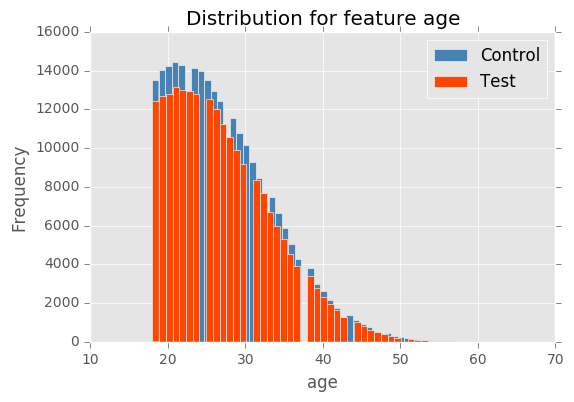

In [23]:
# examine the numeric values
numeric_cols = ['age']
feature_his(data, numeric_cols, is_transform = False)

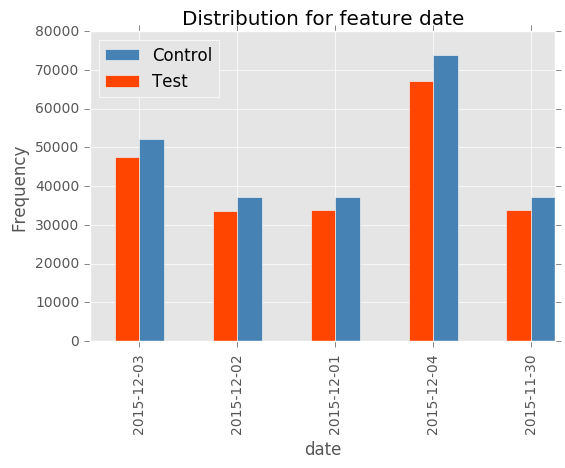

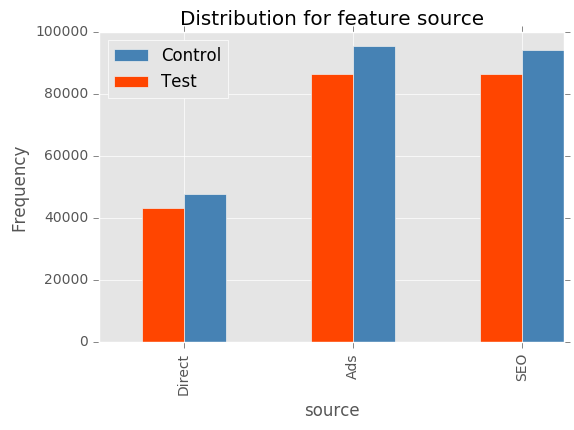

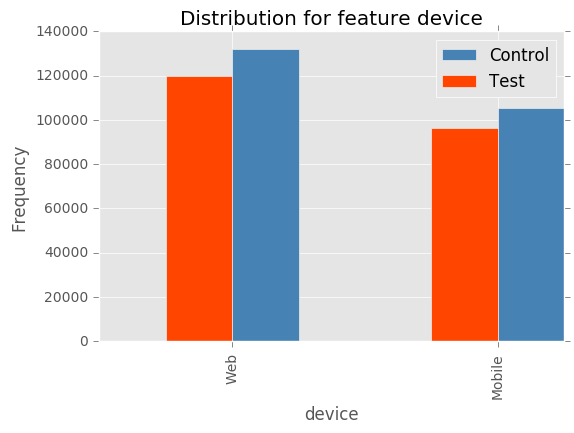

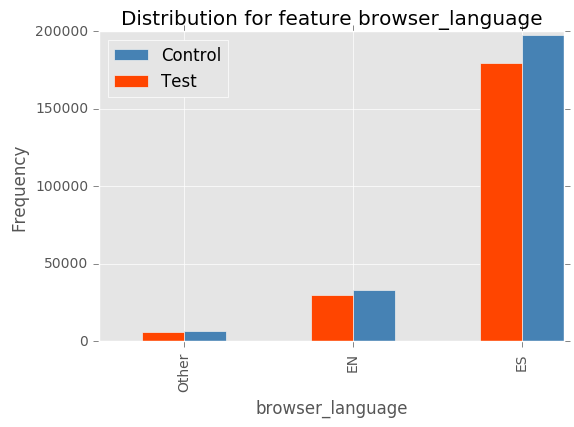

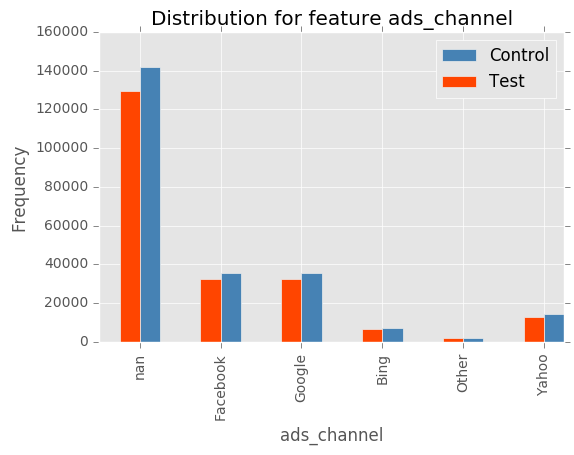

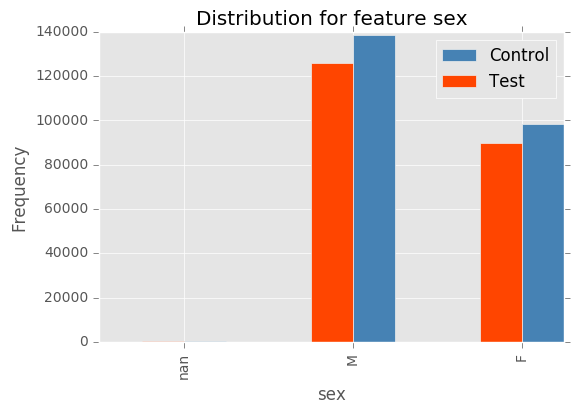

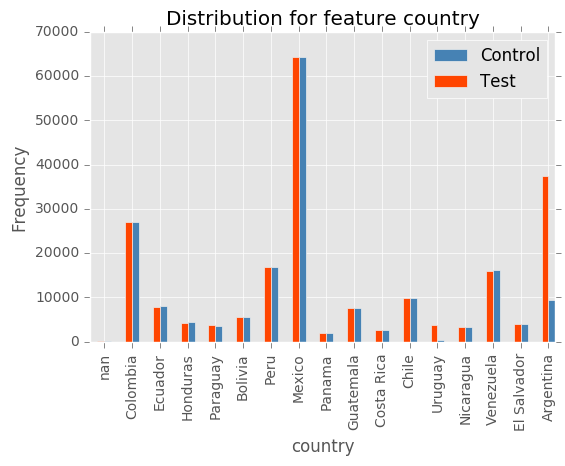

In [24]:
# examine the category values
category_cols = ['date', 'source', 'device', 'browser_language', 'ads_channel' ,'sex', 'country']

feature_his(data, category_cols, is_category = True)

Categorical variables except country showed that there are more users in control group as compared to test group, this is consistent with the previous finding that there are more users in control than in test in general. Let's look into the country variable in details.

In [25]:
countries = data['country'].values
for country in set(countries):
    print 'Number of users in control (0) and test (1) groups in %s'%country
    print data[data['country'] == country][['test', 'user_id']].groupby(['test']).count().reset_index()
    print '\n'

Number of users in control (0) and test (1) groups in nan
Empty DataFrame
Columns: [test, user_id]
Index: []


Number of users in control (0) and test (1) groups in Honduras
   test  user_id
0     0     4361
1     1     4207


Number of users in control (0) and test (1) groups in Peru
   test  user_id
0     0    16869
1     1    16797


Number of users in control (0) and test (1) groups in Uruguay
   test  user_id
0     0      415
1     1     3719


Number of users in control (0) and test (1) groups in El Salvador
   test  user_id
0     0     4108
1     1     4067


Number of users in control (0) and test (1) groups in Nicaragua
   test  user_id
0     0     3419
1     1     3304


Number of users in control (0) and test (1) groups in Panama
   test  user_id
0     0     1966
1     1     1985


Number of users in control (0) and test (1) groups in Mexico
   test  user_id
0     0    64209
1     1    64275


Number of users in control (0) and test (1) groups in Costa Rica
   test  user_id


##### Quick summary 5
* In general, there are more users in the control group than test group across different variables except country.
* There are significant more users in Argentina and Uruguay in test group as compared to control group, which could drive the bias of the test.

#### 3.2 Examin the conversion rate across each category in control and test group
To better understand the the contribution of each variable to the conversion rate in control and test, the conversion rate across each category is analyzed.

In [26]:
def rate_plot(df, cols):
    '''
    function to generate conversion rate plots
    '''
    
    for col in cols:
        # remove spain because there are control data in the case of comparing countries
        if col == 'country':
            df = df[df['country'] != 'Spain']
        ax,fig = plt.subplots()
        test_conv = df[(df['test'] == 1) & (df['conversion'] == 1)][col].value_counts(sort = False, dropna = False)
        test_tol = df[df['test'] == 1][col].value_counts()
        test = test_conv/test_tol
        
        ctrl_conv = df[(df['test'] == 0) & (df['conversion'] == 1)][col].value_counts(sort = False, dropna = False)
        ctrl_tol = df[df['test'] == 0][col].value_counts(sort = False, dropna = False)
        ctrl = ctrl_conv/ctrl_tol
        
        print 'The conversion in control across: %s'%col
        print ctrl, '\n'
        print 'The conversion in test across: %s'%col
        print test, '\n'
        
        ctrl.plot(kind = 'bar', color = 'steelblue', position = 0, width = 0.25)   
        test.plot(kind = 'bar', color = 'orangered', position = 1, width = 0.25) 
        plt.ylabel("Conversion Rate")
        plt.xlabel(col)
        plt.title('Conversion Rate in Control and Test in Different %s'%col)
        plt.legend(['Control', 'Test'], loc = 'best')

The conversion in control across: age
 18.0    0.056539
 19.0    0.056947
 20.0    0.054060
 21.0    0.053145
 22.0    0.053870
 23.0    0.056094
 24.0    0.056912
 25.0    0.052725
 26.0    0.052181
 27.0    0.054022
 28.0    0.056323
 29.0    0.054074
 30.0    0.057988
 31.0    0.054743
 32.0    0.054477
 33.0    0.060222
 34.0    0.054346
 35.0    0.053702
 36.0    0.055215
 37.0    0.055216
 38.0    0.061683
 39.0    0.052194
 40.0    0.062405
 41.0    0.059177
 42.0    0.046552
 43.0    0.062898
 44.0    0.053136
 45.0    0.050473
 46.0    0.067729
 47.0    0.035581
 48.0    0.053812
 49.0    0.053968
 50.0    0.066421
 51.0    0.021053
 52.0    0.026316
 53.0    0.080357
 54.0    0.042857
 55.0    0.100000
 56.0         NaN
 57.0         NaN
 58.0         NaN
 59.0         NaN
 60.0         NaN
 61.0         NaN
 62.0         NaN
 63.0         NaN
 64.0         NaN
 65.0         NaN
 66.0         NaN
 67.0         NaN
 68.0         NaN
NaN      0.077551
Name: age, dtype: float64 

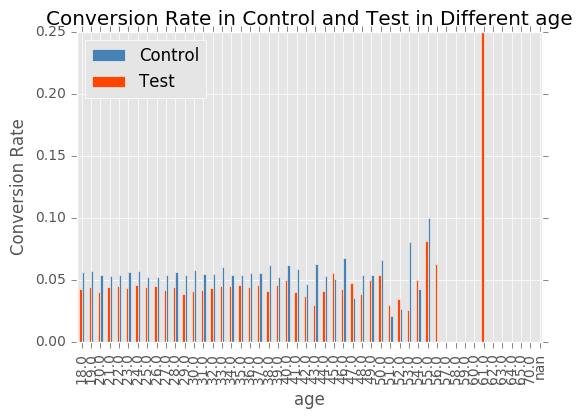

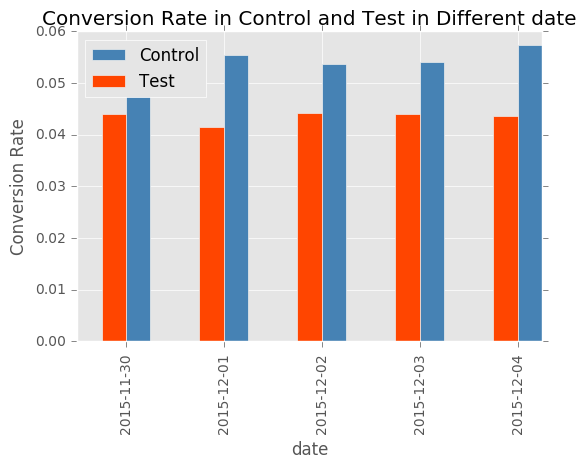

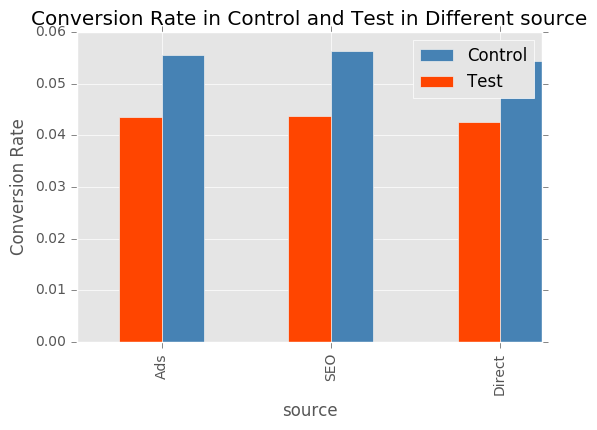

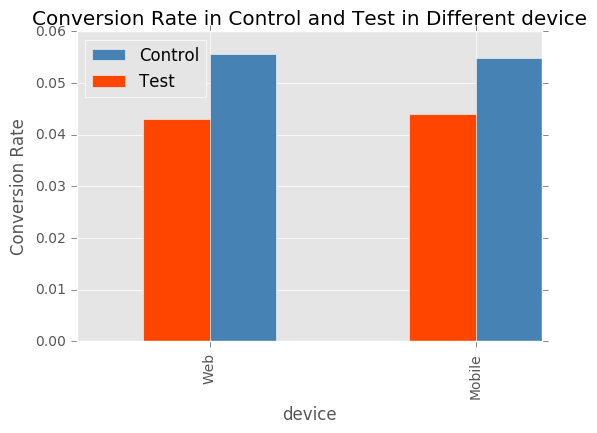

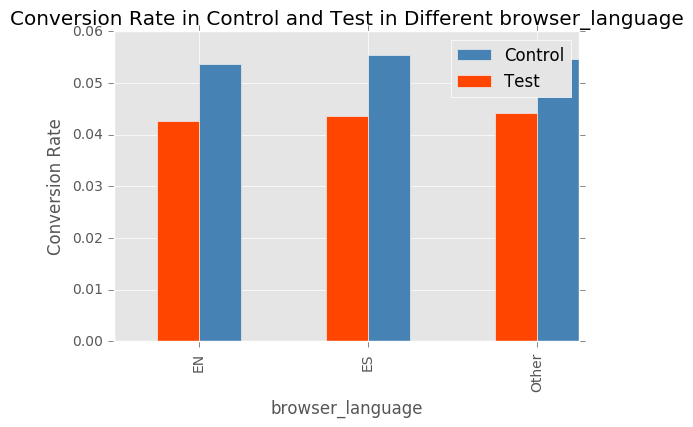

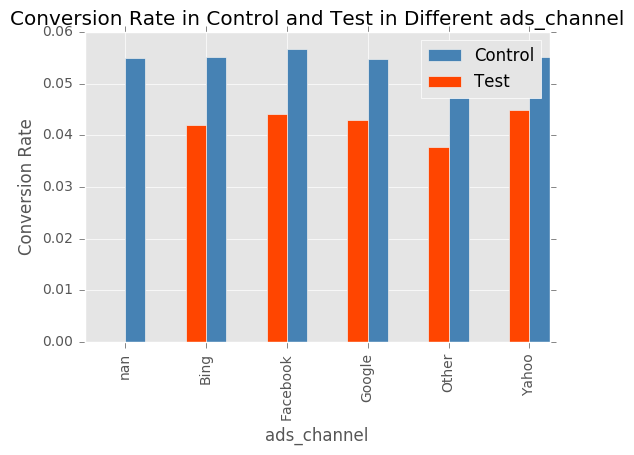

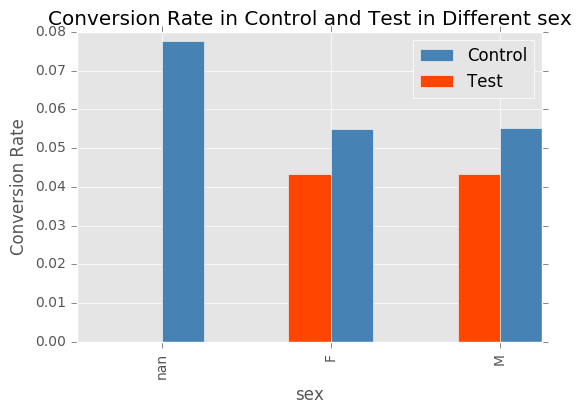

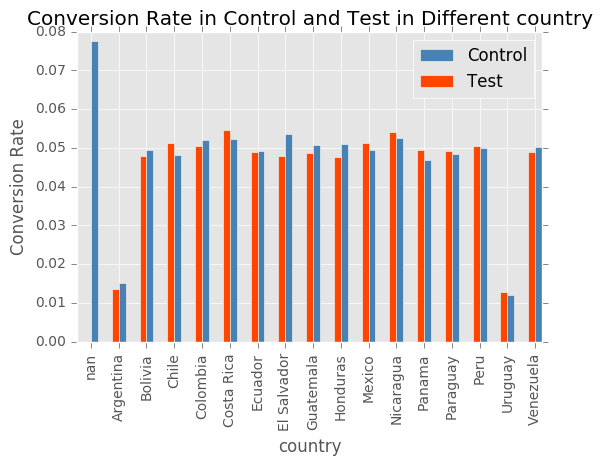

In [27]:
cols = numeric_cols + category_cols
rate_plot(data, cols)

##### Quick summary 6
* The conversation reate is higher in control than test in variables except age and country
* At age 56 and 61, there are users in test group but not in the control group
* In some countries such as Chile and Costa Rica, the conversion rate is higer in test. But in other countries including Bolivia and El Salvador, the conversion rate in higher in control. 

<a id='evaluation'></a>
### 4. A/B Test Evaluation

#### 4.1 A/B Test Re-evaluation

In [28]:
# calculate Chi-square
df_conv = data[['country', 'test', 'conversion' ,'user_id']].groupby(['test', 'conversion', 'country']).count().reset_index()
df_conv = df_conv[df_conv['country'] != 'Spain']
ctrl_conv = df_conv[(df_conv['test'] == 0) & (df_conv['conversion'] == 1)]['user_id'].values
ctrl_not_conv = df_conv[(df_conv['test'] == 0) & (df_conv['conversion'] == 0)]['user_id'].values

test_conv = df_conv[(df_conv['test'] == 1) & (df_conv['conversion'] == 1)]['user_id'].values
test_not_conv = df_conv[(df_conv['test'] == 1) & (df_conv['conversion'] == 0)]['user_id'].values
countries = df_conv['country'].values
for i in xrange(len(ctrl_conv)):
    con_observed = [[ctrl_conv[i], ctrl_not_conv[i]], [test_conv[i], test_not_conv[i]]]
    chi2, p, dof, exp = chi2_contingency(con_observed, correction = True)
    print 'The p-value for Chi-square test in %s is %.2f.'%(countries[i], p)
        
# calculate z-score
test_rate_conv = test_conv*1./(test_conv + test_not_conv)
ctrl_rate_conv = ctrl_conv*1./(ctrl_conv + ctrl_not_conv)

var_test_conv = test_rate_conv*(1.0 - test_rate_conv)/(test_conv + test_not_conv)
var_ctrl_conv = ctrl_rate_conv*(1.0 - ctrl_rate_conv)/(ctrl_conv + ctrl_not_conv)
#print 'The variance in test group is %.2e, in control group is %.2e' %(var_test, var_ctrl)
z = (test_rate_conv - ctrl_rate_conv)/((var_test_conv + var_ctrl_conv)**0.5)
for i in xrange(len(ctrl_conv)):
    print 'The z-score for z-score test in %s is %.2f'%(countries[i], z[i])
    print 'The difference between control and test in %s is significant? %s'%(countries[i], z[i] < -1.65 or z[i] > 1.65)

The p-value for Chi-square test in Argentina is 0.35.
The p-value for Chi-square test in Bolivia is 0.75.
The p-value for Chi-square test in Chile is 0.32.
The p-value for Chi-square test in Colombia is 0.44.
The p-value for Chi-square test in Costa Rica is 0.73.
The p-value for Chi-square test in Ecuador is 0.99.
The p-value for Chi-square test in El Salvador is 0.27.
The p-value for Chi-square test in Guatemala is 0.60.
The p-value for Chi-square test in Honduras is 0.50.
The p-value for Chi-square test in Mexico is 0.17.
The p-value for Chi-square test in Nicaragua is 0.82.
The p-value for Chi-square test in Panama is 0.76.
The p-value for Chi-square test in Paraguay is 0.93.
The p-value for Chi-square test in Peru is 0.79.
The p-value for Chi-square test in Uruguay is 0.93.
The p-value for Chi-square test in Venezuela is 0.59.
The z-score for z-score test in Argentina is -0.96
The difference between control and test in Argentina is significant? False
The z-score for z-score test in

#### 4.2 Bucket Imbalance Detection
Refer to [Detecting and avoiding bucket imbalance in A/B tests](https://blog.twitter.com/2015/detecting-and-avoiding-bucket-imbalance-in-ab-tests)

In [29]:
from scipy.stats import chisquare
class ImbalanceDetection():
    '''class to detect bucket imbalance in A/B test using multinomial goodness of test '''
    def __init__(self, df, variables, target, count_id):
        '''
        @param: variables
        @param: df
        @param: target
        @param: count_id
        '''
        self.variables = variables
        self.df = df
        self.target = target
        self.count_id = count_id
    
    def compute_table(self, var):
        '''
        function to compute contingency table
        '''
        new_df = self.df[[var, self.target, self.count_id]].groupby([self.target, var]).count().reset_index()
        self.ctrl = list(new_df[new_df[self.target] == 0][self.count_id].values)
        self.test = list(new_df[new_df[self.target] == 1][self.count_id].values)
        self.names = new_df[var].values
        if var == 'country':
            self.test.insert(-2, 0)
    
    def compute_p_value(self, var):
        '''
        function to compute chisquare goodness fit p value
        null hypothesis: the actual observed count equals to the expected count
        alternative hypothesis: the actual observed count does not equal to the expected count
        '''
        self.compute_table(var)
        _, self.p = chisquare([self.ctrl, self.test])
        
    def detection_res(self):
        '''
        determinate if there is a bucket imbalance for a A/B test to make the A/B test not realiable
        False: the A/B test result is not realiable because of bucket imbalance existance
        True: the A/B test result is realiable
        '''
        for var in self.variables:
            self.compute_p_value(var)
            print '\n'
            for i in xrange(len(self.p)):
                print 'Fit goodness p_value in %s is %.2f'%(self.names[i], self.p[i])
                if self.p[i] < 0.025:
                    return False
            print '\n'
        return True

In [30]:
# test variables and the detection algorithm
df = data
variables = ['country', 'browser_language', 'device', 'source']
target = 'test'
count_id = 'user_id'
dect = ImbalanceDetection(df, variables, target, count_id)

print '''NOTE: False: the A/B test result is not realiable because of bucket imbalance existance\nTrue: the A/B test result is realiable'''
print '\nThe result is %s.' %(dect.detection_res())

NOTE: False: the A/B test result is not realiable because of bucket imbalance existance
True: the A/B test result is realiable


Fit goodness p_value in Argentina is 0.00

The result is False.


##### Quick summary 7
* The conversion rate in control and test is not significant in individual country except Spain
* An algorithm based on multinomial goodness of test can be used to detect bucket imbalance existance
* There are bucket imbalance in the following countries: Argentina, Spain and Uruguay

<a id='summary'></a>
### 5. Summary and Recommendation

#### Confirm that the test is actually negative.
If all data across differnt countries are compared together, the conversion rate in in test group is 4.34% which is lower than the rate in control group 5.52%. And the difference between test and control is statistically different. However, if looking into individual country, there are no difference for conversion rate between control and test in most countries except Spain.

#### Explain why that might be happening. Are the localized translations really worse?
There are several issues:
* In general, there are more users in the control group than test group across different variables except country.
* There are significant more users in Argentina and Uruguay in test group as compared to control group, which could drive the bias of the test.
* There are only users for control but not for test in Spain.

#### If you identified what was wrong, design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.
Based on data exploration, the users with the following characteristics are more likely to be classified as at risk:

* An algorithm based on multinomial goodness of test can be used to detect bucket imbalance existance
* The A/B test result is not realiable when bucket imbalance is detected by the algorithm and will return False. Otherwise, the algorithm will return True.

#### Recommendations
* Alway try to avoid bucket imbalance issue when designing a A/B test.
* Alway try to avoid design multivariances A/B test.
* Considering the contribution of different variances and avoiding bias when analyzing A/B test results.